# In the Trondead game, a player who has horrible aim, has a 30% chance of hitting one of the 3 enemies. if the player shoots 15 times, what is the probability that this player will hit one of the enemies 3?


The assumptions I will make are that the player has horrible aim so they have 30% of hitting one of the 3 enemies.
The random variables are the 10 shots from the the 3 enemies.
one trial of the simulation will be 15 shots from the player and seeing if they landed on one or more of the 3 enemies or not. 
the success will be if that player gets hits an enemy 3 times or more from the 15 shots shot, and a failure will be if they don't hit the enemy at all. 

In [1]:
!pip install ale-py
!pip install gymnasium
!pip install 'gymnasium[atari]'

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import seaborn as sns
import pandas as pd
import ale_py
from gymnasium.spaces import Discrete, Box
from ale_py import ALEInterface
ale = ALEInterface()

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
all_envs = gym.envs.registry 

In [3]:
gym.register_envs(ale_py)

env = gym.make('ALE/Breakout-v5')
obs, info = env.reset()
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
env.close()

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


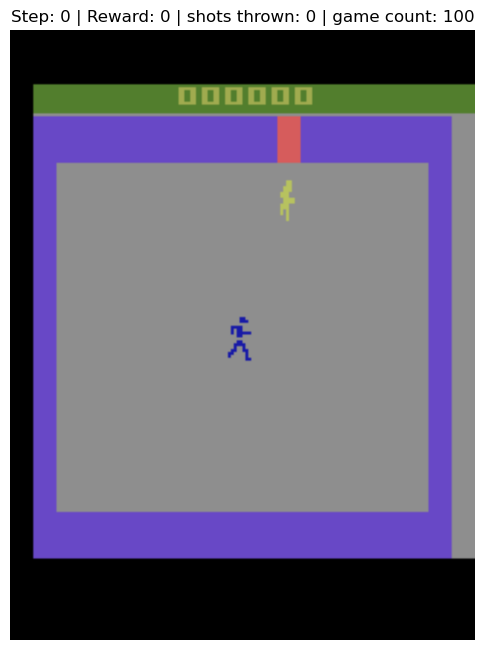

78
1437
0.0


In [24]:
env = gym.make("ALE/Trondead-v5", render_mode='rgb_array')
Discrete(18)
RENDER_EVERY = 100
SLEEP_TIME = 0.01
successful_games = 0
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0
shots_thrown = 0
game_count = 0
tothits =0
totmisses =0

while game_count <= 100:
    shots_thrown = 0
    observation, info = env.reset()
    total_reward = 0
    previous_lives = info.get('lives', 1)
    
    for step in range(500):
        
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        current_lives = info.get('lives', 1)

        
        if action in [1,10]:
            shots_thrown += 1
        
        if step % RENDER_EVERY == 0:
            clear_output(wait=True)
            ax.clear()
            ax.imshow(env.render())
            ax.set_title(f"Step: {step} | Reward: {total_reward:.0f} | shots thrown: {shots_thrown} | game count: {game_count}")
            ax.axis('off')
            display(fig)
        
        if SLEEP_TIME > 0:
                time.sleep(SLEEP_TIME)
        time.sleep(0.01)
        
        if terminated or truncated:
            pass
        if shots_thrown == 15:
            if total_reward >= 3 :
                tothits += 3
                totmisses += 12
                successful_games += 1
            elif total_reward == 2:
                tothits += 0
                totmisses += 13
                
            elif total_reward == 1:
                tothits += 0 
                totmisses += 14
                
            else:
                tothits += 0
                totmisses += 15
                
            
            observation, info = env.reset()
            break
    
    game_count += 1
    time.sleep(0.1)
    

plt.close()
env.close()
print(tothits)
print(totmisses)
print(total_reward)


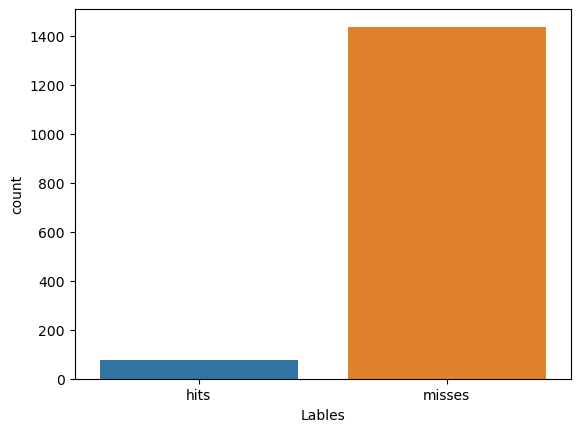

In [25]:
info = {"Lables" : ['hits', 'misses'],
        "count" : [tothits, totmisses]}
ax.set_title("100 trials ran")
df = pd.DataFrame(info)
sns.barplot(x='Lables', y='count', data=df)

plt.show()

In [26]:
empirical_probability = successful_games / game_count
print("Empirical probability of hitting ≥3 enemies:", empirical_probability)

Empirical probability of hitting ≥3 enemies: 0.25742574257425743


The theoretical binomial probability is 17% and the empirical probability based on my simulation is 26% rounded.